In [1]:
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer
import numpy as np
import lavavu
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

/home/lgrose/anaconda3/envs/loop/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.decomposition.pca module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.
  warnings.warn(message, FutureWarning)


# Implicit benchmark data set - Moureze, synthetic hydrothermal body. 

*Data set interpreted and prepared in July 2019 by Guillaume.Caumon@univ-lorraine.fr, 
to whom questions should be addressed.*

This data set is generated from a perturbed distance field to a set of fractures
above a basement surface. The surface is quite complex and has many features at
two main resolutions (one corresponding to the fractures and the other one to
the noise). It is samples by two sets of cross section lines and a set of
points. 

## Contents
 
 * `Moureze_Points.csv` correspond are samples of the surface to reconstruct. 
 Their density decreases from south to north (the surface is clearly
 undersampled in the north). Some of the points bear
 orientation vectors representing the normal to the surface. 
 * `Sections_[EW,NS].csv` are sections lines. The field `PART_ID` is a unique 
 section identifier in each file. 

## Results

Please rename the `Results_` as `Results_YOURNAME` directory. The directory
contains an empty Voxet (Cartesian Grid) and an empty 
tetrahedral mesh conformable to faults (resolution 3m), both 
in Gocad ASCII format.

### Scalar Field
Suggested size of the axis-aligned modeling box: 
Origin: -5 -5 -200
Maximum: 305 405 -50

Suggested resolution: 2m (grid size 156 x 206 x 76)

An empty Gocad Voxet is already in the results directory. You may write your values in binary format (float C 4-byte values), or ASCII format.  

### Surfaces 

Please use DXF, Gocad and/or .obj format. 


In [14]:
dips = pd.read_csv('../Moureze_Points.csv',delimiter=';')
points_file_names = ['../Moureze_Points.csv']
section_file_names = ['../Sections_EW.csv','../Sections_NS.csv']
dips = dips.rename(columns={'OrientX':'nx','OrientY':'ny','OrientZ':'nz'})

# import all of the csv into the same dataframe
dfs = []
for f in points_file_names:
    dfs.append(pd.read_csv(f,delimiter=';'))
points = pd.concat(dfs,axis=0,ignore_index=True)
# sections
dfs = []
for f in section_file_names:
    dfs.append(pd.read_csv(f,delimiter=';'))
sections = pd.concat(dfs,axis=0,ignore_index=True)
sections['val'] = 0
points.loc[points['OrientX']<-2,['OrientX','OrientY','OrientZ']] = np.nan
points = points.rename(columns={'OrientX':'nx','OrientY':'ny','OrientZ':'nz'})

points['val'] = 0
# data = pd.concat(dips,se)
# apoints = pd.read_csv('APoints.csv',delimiter=';')
# asection = pd.read_csv('ASection.csv',delimiter=';')

<ipython-input-14-6bf38d462e42>:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sections = pd.concat(dfs,axis=0,ignore_index=True)


In [15]:
points

,X,Y,Z,nx,ny,nz,Cutoff,val
0,272.000000,86.000000,-149.120,NaN,NaN,NaN,0.455221,0
1,256.198395,344.000000,-100.000,0.671273,0.641262,0.371719,0.674027,0
2,236.000000,17.083025,-90.000,NaN,NaN,NaN,0.757903,0
3,199.974075,351.877136,-157.355,0.447513,0.563921,0.694065,0.786050,0
4,61.933350,21.684322,-124.568,-0.654601,0.659643,-0.369282,0.969300,0
...,...,...,...,...,...,...,...,...
3426,89.924927,86.352005,-120.026,NaN,NaN,NaN,0.067264,0
3427,75.935799,116.717010,-140.023,NaN,NaN,NaN,0.783988,0
3428,177.964096,233.829971,-148.831,NaN,NaN,NaN,0.523201,0
3429,46.487995,17.739241,-148.019,NaN,NaN,NaN,0.110549,0


In [16]:
data = pd.concat([points,sections])
data['type'] = 'strati'

<ipython-input-16-0dff47594743>:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  data = pd.concat([points,sections])


In [17]:
data

,0,Cutoff,PART_ID,X,Y,Z,nx,ny,nz,val,type
0,NaN,0.455221,NaN,272.000000,86.000000,-149.120,NaN,NaN,NaN,0,strati
1,NaN,0.674027,NaN,256.198395,344.000000,-100.000,0.671273,0.641262,0.371719,0,strati
2,NaN,0.757903,NaN,236.000000,17.083025,-90.000,NaN,NaN,NaN,0,strati
3,NaN,0.786050,NaN,199.974075,351.877136,-157.355,0.447513,0.563921,0.694065,0,strati
4,NaN,0.969300,NaN,61.933350,21.684322,-124.568,-0.654601,0.659643,-0.369282,0,strati
...,...,...,...,...,...,...,...,...,...,...,...
20652,NaN,0.462246,13.0,248.000000,72.403862,-156.404,NaN,NaN,NaN,0,strati
20653,NaN,0.411353,13.0,248.000000,72.000000,-157.934,NaN,NaN,NaN,0,strati
20654,NaN,0.187044,13.0,248.000000,71.962570,-157.963,NaN,NaN,NaN,0,strati
20655,NaN,0.165205,13.0,248.000000,71.913696,-158.000,NaN,NaN,NaN,0,strati


In [18]:
boundary_points = np.zeros((2,3))

boundary_points[0,0] = -5
boundary_points[0,1] = -5
boundary_points[0,2] = -200
boundary_points[1,0] = 305
boundary_points[1,1] = 405
boundary_points[1,2] = -50


In [19]:
model = GeologicalModel(boundary_points[0,:],boundary_points[1,:])
model.set_model_data(data)
s = 'lu'
e  = 20000
strati = model.create_and_add_foliation("strati", 
                                           interpolatortype="PLI",
                                           nelements=e,
                                           buffer=0.2,
                                           solver=s,
#                                            damp=True,
                                       )


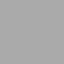

In [21]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(strati['feature'],isovalue=0)
viewer.add_data(strati['feature'])
viewer.interactive()

In [50]:
import re
def read_voxet(voxetname,propertyfile):
    """
    Read a gocad property file and the geometry information from the .vo file
    voxetname - is the path to the voxet file
    propertyfile is the path to the binary file
    Returns
    origin numpy array
    voxet_extent - is the length of each axis of the voxet
    N is the number of steps in the voxet
    array is the property values
    steps is the size of the step vector for the voxet 
    """
    array = np.fromfile(propertyfile,dtype='float32')
    array = array.newbyteorder()
    with open(voxetname,'r') as file:
        for l in file:
            if 'AXIS_O ' in l:
                origin = np.array(re.findall(r"[-+]?\d*\.?\d+|[-+]?\d+",l)).astype(float)
            if 'AXIS_U ' in l:
                U = float(re.findall(r'[\d\.\d]+',l)[0])
            if 'AXIS_V ' in l:
                V = float(re.findall(r'[\d\.\d]+',l)[1])
            if 'AXIS_W ' in l:
                W = float(re.findall(r'[\d\.\d]+',l)[2])
            if 'AXIS_N ' in l:
                N = np.array(re.findall(r'[\d\.\d]+',l)).astype(int) 
    voxet_extent = np.array([U,V,W])
    steps = (voxet_extent ) / (N-1)
    return origin, voxet_extent, N, array, steps

In [111]:
def write_property_to_gocad_voxet(propertyfilename, propertyvalues):
    """
    This function writes a numpy array into the right format for a gocad
    voxet property file. This assumet there is a property already added to the .vo file,
    and is just updating the file.
    propertyfile - string giving the path to the file to write
    propertyvalues - numpy array nz,ny,nx ordering and in float format
    """
    propertyvalues = propertyvalues.astype('float32')
    array = propertyvalues.newbyteorder()
    array.tofile(propertyfilename)
    

In [103]:
origin, voxet_extent, N, array, steps = read_voxet('Results.vo','ResultsLoopStructural_result@@')
print(array)

[0. 0. 0. ... 0. 0. 0.]


In [97]:
x = np.linspace(origin[0],voxet_extent[0]+origin[0],N[0])
y = np.linspace(origin[1],voxet_extent[1]+origin[1],N[1])
z = np.linspace(origin[2],voxet_extent[2]+origin[2],N[2])

xx, yy, zz = np.meshgrid(x,y,z,indexing='ij')

In [98]:
eval_points = model.scale(np.array([xx.flatten(order='F'),yy.flatten(order='F'),zz.flatten(order='F')]).T)
vals = strati['feature'].evaluate_value(eval_points)
print(vals)

[-0.45151973 -0.44897853 -0.44643335 ...  0.90960056  0.91926415
  0.92890068]


In [99]:
vals[~np.isnan(vals)]
vals2 = xx.reshape((N[2],N[1],N[0])).astype(float)


In [100]:
print(vals2)

[[[ -5.  -5.  -5. ...  -5.  -5.  -5.]
  [ -5.  -5.  -5. ...  -5.  -5.  -5.]
  [ -5.  -5.  -5. ...  -5.  -5.  -5.]
  ...
  [ -1.  -1.  -1. ...  -1.  -1.  -1.]
  [ -1.  -1.  -1. ...  -1.  -1.  -1.]
  [ -1.  -1.  -1. ...  -1.  -1.  -1.]]

 [[ -1.  -1.  -1. ...  -1.  -1.  -1.]
  [ -1.  -1.  -1. ...  -1.  -1.  -1.]
  [ -1.  -1.  -1. ...  -1.  -1.  -1.]
  ...
  [  3.   3.   3. ...   3.   3.   3.]
  [  3.   3.   3. ...   3.   3.   3.]
  [  3.   3.   3. ...   3.   3.   3.]]

 [[  3.   3.   3. ...   3.   3.   3.]
  [  3.   3.   3. ...   3.   3.   3.]
  [  3.   3.   3. ...   3.   3.   3.]
  ...
  [  7.   7.   7. ...   7.   7.   7.]
  [  7.   7.   7. ...   7.   7.   7.]
  [  7.   7.   7. ...   7.   7.   7.]]

 ...

 [[293. 293. 293. ... 293. 293. 293.]
  [293. 293. 293. ... 293. 293. 293.]
  [293. 293. 293. ... 293. 293. 293.]
  ...
  [297. 297. 297. ... 297. 297. 297.]
  [297. 297. 297. ... 297. 297. 297.]
  [297. 297. 297. ... 297. 297. 297.]]

 [[297. 297. 297. ... 297. 297. 297.]
  [297. 297.

In [112]:
write_property_to_gocad_voxet('ResultsLoopStructural_result@@',vals2.flatten(order='C'))

In [113]:
origin, voxet_extent, N, array, steps = read_voxet('Results.vo','ResultsLoopStructural_result@@')
print(array)
print(vals2.flatten(order='C'))

[5.7666234e-41 5.7666234e-41 5.7666234e-41 ... 1.1809565e-38 1.1809565e-38
 1.1809565e-38]
[ -5.  -5.  -5. ... 305. 305. 305.]


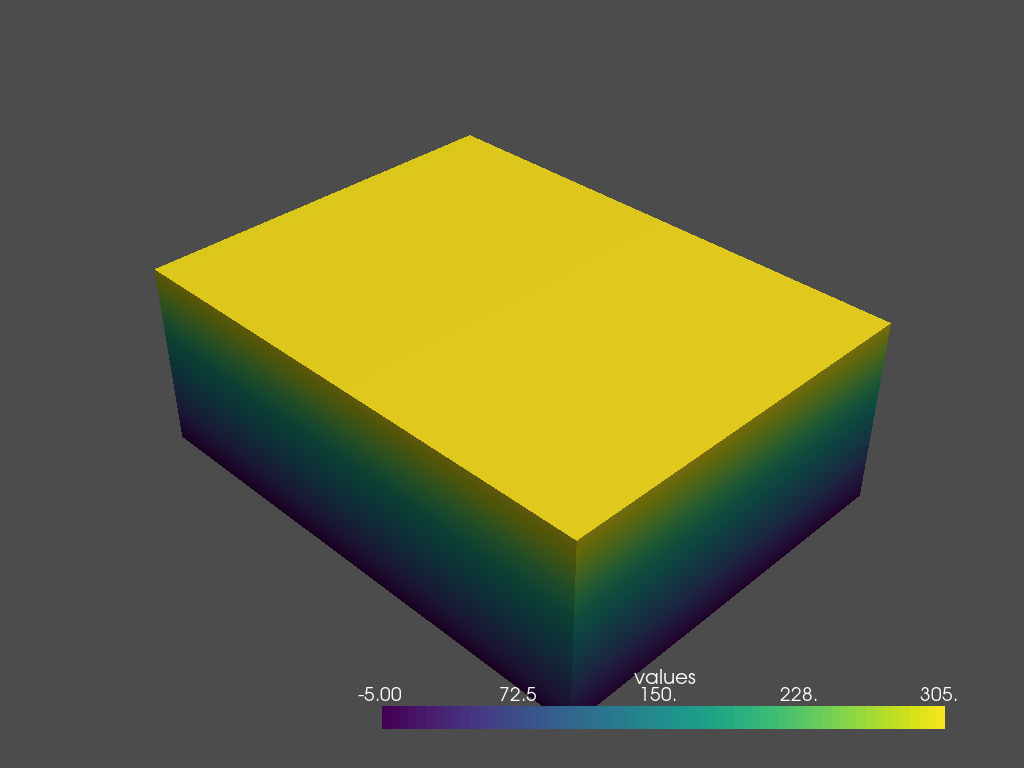

ERROR:root:The interactor must be set prior to enabling/disabling widget


In [74]:
import pyvista as pv
# Create the spatial reference
grid = pv.UniformGrid()

# Set the grid dimensions: shape because we want to inject our values on the
#   POINT data
grid.dimensions = N#slicedIm.shape

# Edit the spatial reference
grid.origin = origin#(0, 0, 0)  # The bottom left corner of the data set
grid.spacing = steps  # These are the cell sizes along each axis

# Add the data values to the cell data
# grid.point_arrays['Z'] = 
grid.point_arrays["values"] = vals2.flatten(order='C')#.astype(float)

# Now plot the grid!
grid.plot(show_edges=False)